In [1]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import statsmodels.graphics.api as smg
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Inventario de movimientos

(5713, 5293)


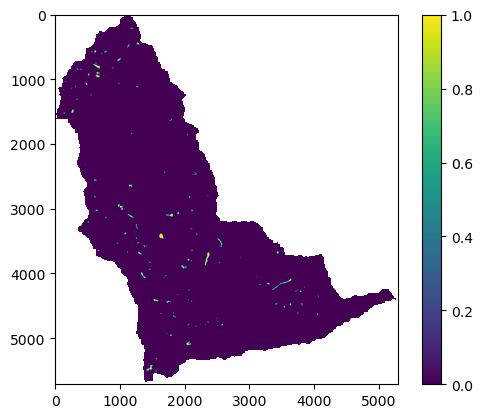

In [2]:
raster = rio.open("C:\Carto\Movimientos.tif")
inventario=raster.read(1)
inventario=np.where(inventario>=100,np.nan,inventario)
print(inventario.shape)
plt.imshow(inventario)
plt.colorbar();

In [3]:
np.unique(inventario)

array([ 0.,  1., nan])

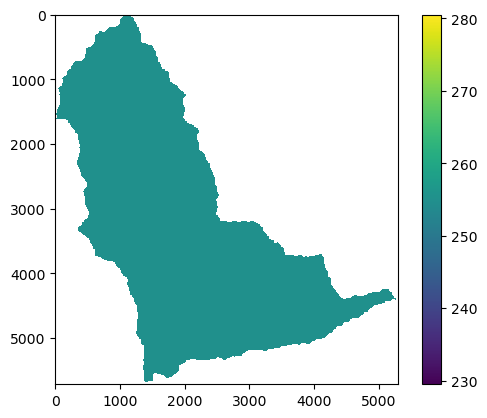

In [4]:
raster = rio.open("https://github.com/Erluan07/Cartografia-Geotecnica/blob/main/Taller_1/2_PYTHON/Limite.tif?raw=true")
msk=raster.read_masks(1)
msk=np.where(msk==0,np.nan,msk)
plt.imshow(msk)
plt.colorbar();

(12048589,)

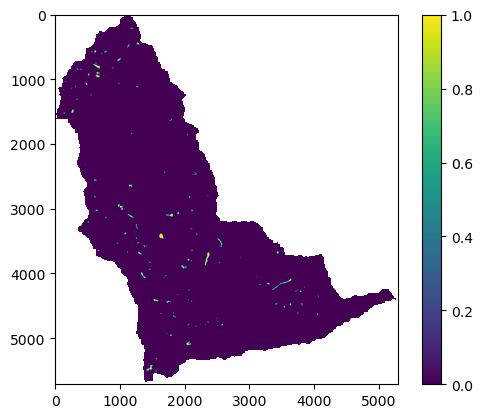

In [5]:
inventario=msk*inventario
inventario=np.where(inventario>=100,1,inventario)
plt.imshow(inventario)
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar();
inventario_vector_MenM.shape

# Variables

(5713, 5293)


(12048589,)

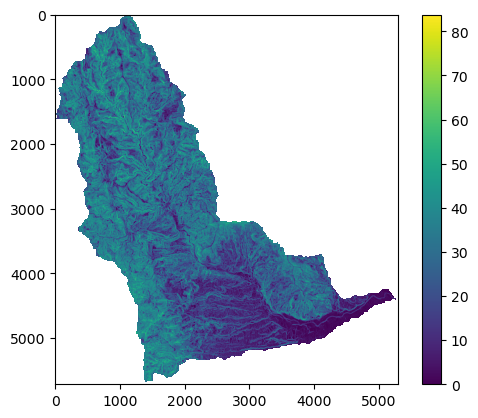

In [6]:
rasterpendiente = rio.open("C:\Carto\Pendientes.tif")
pendiente=rasterpendiente.read(1)
pendiente=np.where(pendiente<=-1,np.nan,pendiente)
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
plt.imshow(pendiente)
plt.colorbar();
print(pendiente.shape)
pendiente_vector_MenM.shape # otra forma de saber las dimensiones


(5713, 5293)


(12048589,)

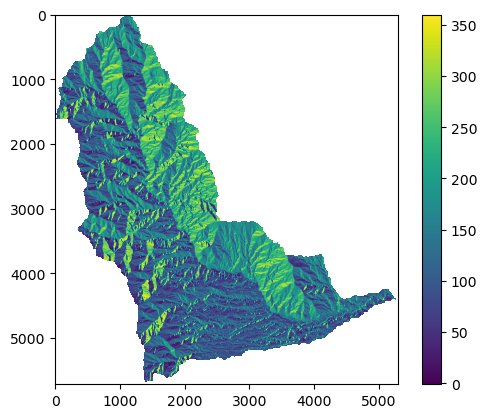

In [7]:
rasteraspecto=rio.open("C:\Carto\Aspectos.tif")
aspecto=rasteraspecto.read(1)
aspecto=np.where(aspecto<-10000,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar();
print(aspecto.shape)
aspecto_vector_MenM.shape

(5713, 5293)


(12048589,)

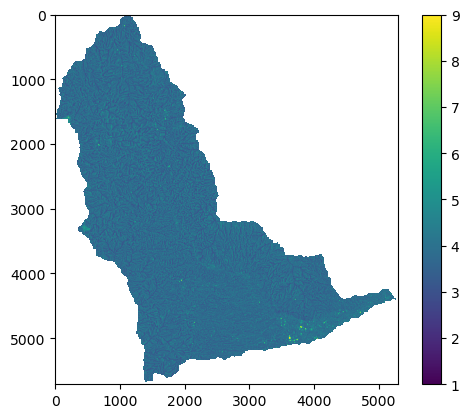

In [8]:
rastercurvatura=rio.open("C:\Carto\Curvatura_Total.tif")
curvatura=rastercurvatura.read(1)
curvatura=np.where(curvatura>=100,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
plt.imshow(curvatura)
plt.colorbar();
print(curvatura.shape)
curvatura_vector_MenM.shape

(5713, 5293)


(12048589,)

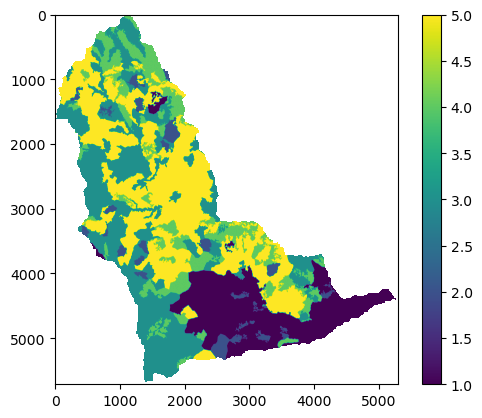

In [9]:
rastercoberturas=rio.open("C:\Carto\Coberturas.tif")
coberturas=rastercoberturas.read(1)
coberturas=np.where(coberturas>=100,np.nan,coberturas)
coberturas_vector=coberturas.ravel()
coberturas_vector_MenM=coberturas_vector[~np.isnan(coberturas_vector)]
plt.imshow(coberturas)
plt.colorbar();
print(coberturas.shape)
coberturas_vector_MenM.shape

(5713, 5293)
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. nan]


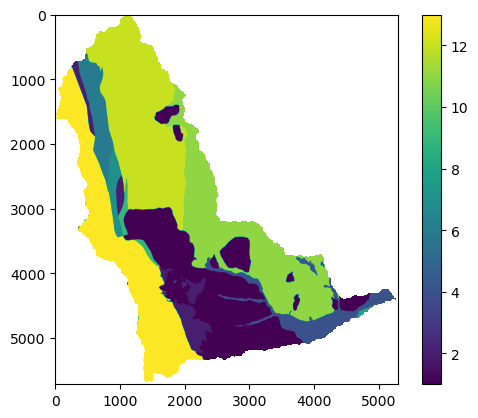

In [10]:
rastergeologia=rio.open("C:\Carto\Geologia.tif")
geologia=rastergeologia.read(1)
geologia=np.where(geologia>=100,np.nan,geologia)
geologia=np.where(geologia==0,6,geologia)
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
plt.imshow(geologia)
plt.colorbar();
print(geologia.shape)
geologia_vector_MenM.shape
print(np.unique(geologia))

(5713, 5293)


(12048589,)

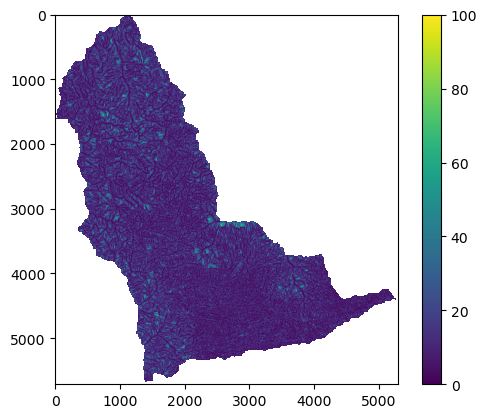

In [11]:
rasterfacc=rio.open("C:\Carto\Facc.tif")
facc=rasterfacc.read(1)
facc=np.where(facc<0,np.nan,facc)
facc=np.where(facc>100,0,facc)
facc_vector=facc.ravel()
facc_vector_MenM=facc_vector[~np.isnan(facc_vector)]
plt.imshow(facc)
plt.colorbar();
print(facc.shape)
facc_vector_MenM.shape

# Dataframe

In [12]:
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'coberturas':coberturas_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM, "curvatura total":curvatura_vector_MenM,"flujo":facc_vector_MenM}
df = pd.DataFrame(d)
print(list(df.columns))

['inventario', 'pendiente', 'coberturas', 'aspecto', 'geologia', 'curvatura total', 'flujo']


In [102]:
df.head()

,inventario,pendiente,coberturas,aspecto,geologia,curvatura total,flujo
0,0.0,1.206597,1.0,186.982422,12.0,2.0,1.0
1,0.0,1.274284,1.0,169.732376,12.0,2.0,0.0
2,0.0,2.255759,1.0,141.842773,12.0,2.0,1.0
3,0.0,3.637963,1.0,133.590073,12.0,2.0,1.0
4,0.0,4.627886,1.0,135.497665,12.0,2.0,1.0


In [73]:
df["curvatura total"].value_counts()

curvatura total
2.0    4078402
6.0    3738968
3.0    1986795
4.0    1816867
1.0     113171
5.0     101149
8.0      83607
7.0      67610
9.0      62020
Name: count, dtype: int64

# Muestreo

In [15]:
(63819*100)/11984770

0.5325008323063355

In [14]:
df1=df[(df["inventario"]==1) | (df["inventario"]==0).sample(frac=.1)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1262339 entries, 7 to 12048574
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   inventario       1262339 non-null  float64
 1   pendiente        1262339 non-null  float32
 2   coberturas       1262339 non-null  float64
 3   aspecto          1262339 non-null  float32
 4   geologia         1262339 non-null  float64
 5   curvatura total  1262339 non-null  float64
 6   flujo            1262339 non-null  float32
dtypes: float32(3), float64(4)
memory usage: 62.6 MB


In [17]:
resumen=df1.describe().T
print(resumen)

                     count        mean        std  min        25%         50%  \
inventario       1262280.0    0.050559   0.219094  0.0   0.000000    0.000000   
pendiente        1262280.0   26.672523  13.650987  0.0  16.212319   27.480183   
coberturas       1262280.0    3.393368   1.449305  1.0   3.000000    3.000000   
aspecto          1262280.0  154.145065  93.711769 -1.0  78.668650  142.739418   
geologia         1262280.0    8.400844   4.868062  0.0   2.000000   11.000000   
curvatura total  1262280.0    3.833161   1.762479  1.0   2.000000    3.000000   

                        75%         max  
inventario         0.000000    1.000000  
pendiente         36.867698   83.687714  
coberturas         5.000000    5.000000  
aspecto          222.623253  359.998810  
geologia          12.000000   13.000000  
curvatura total    6.000000    9.000000  


In [16]:
matriz=df.drop(['inventario'],axis=1) # función para eliminar una columna (axis=1)
matriz.head()

,pendiente,coberturas,aspecto,geologia,curvatura total,flujo
0,1.206597,1.0,186.982422,12.0,2.0,1.0
1,1.274284,1.0,169.732376,12.0,2.0,0.0
2,2.255759,1.0,141.842773,12.0,2.0,1.0
3,3.637963,1.0,133.590073,12.0,2.0,1.0
4,4.627886,1.0,135.497665,12.0,2.0,1.0


In [17]:
matriz_cont=matriz.drop(['geologia',"coberturas","curvatura total"],axis=1)
matriz_cont.head()

,pendiente,aspecto,flujo
0,1.206597,186.982422,1.0
1,1.274284,169.732376,0.0
2,2.255759,141.842773,1.0
3,3.637963,133.590073,1.0
4,4.627886,135.497665,1.0


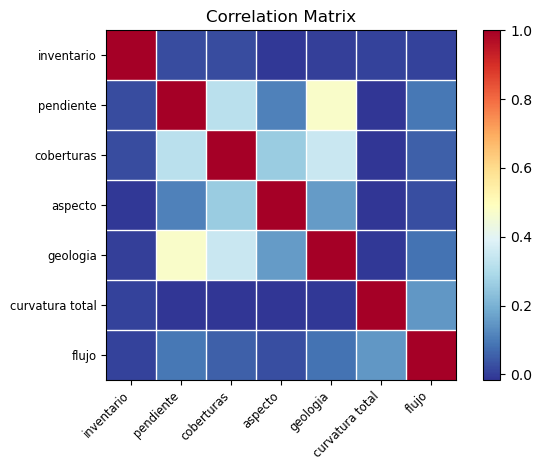

In [97]:
MatCorre=DataFrame(df.corr())
smg.plot_corr(MatCorre, xnames=list(MatCorre.columns)) ;

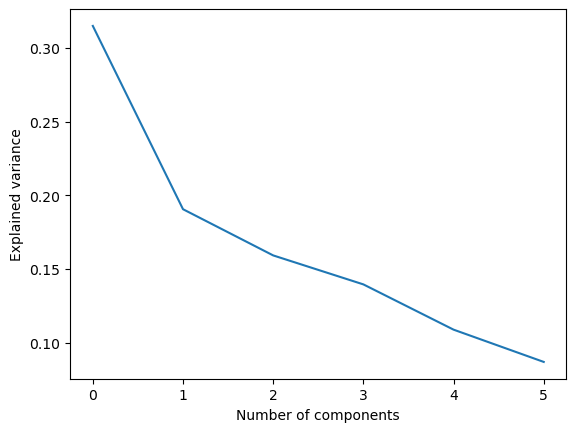

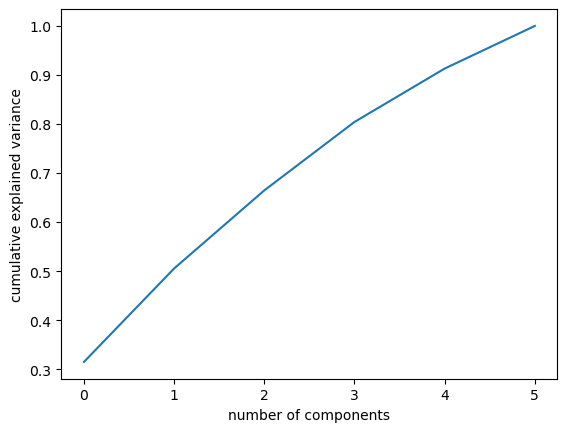

C:\Users\Erluan\anaconda3\envs\Cartografia\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


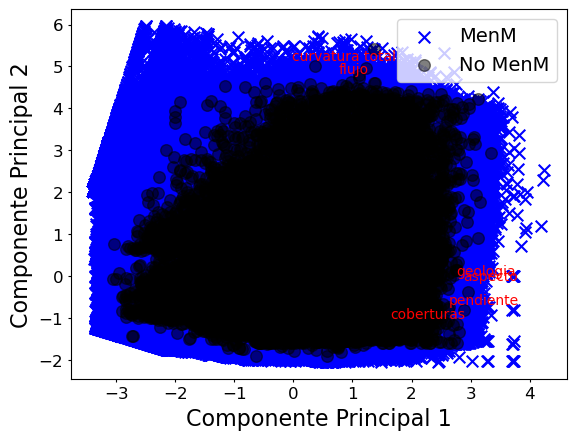

In [103]:
#Se importan los archivos
data = df
puntos = data['inventario']
data.drop('inventario', axis=1, inplace=True)

# Se debe escalar los datos antes de aplicar PCA
data = pd.DataFrame(scale(data), columns=['geologia', 'pendiente', 'coberturas', 'aspecto', 'curvatura total', 'flujo'])

## Se implementa el análisi PCA con la libreria sklearn de python
n = len(data.columns)
pca = PCA(n_components=n)
pca = pca.fit(data)
pca_samples = pca.transform(data)

#Se puede graficar cuanto aporta a la varianza cada componente generado
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#Para identificar cada variable como se relaciona con las componentes utilizamos las figuras byplot de python
# 0,1 denota el componente princiapl 1 y 2 (PC1 and PC2); para otros componentes se modifica el número
xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(data)[:,0] # Componente principal 1
ys = pca.transform(data)[:,1] # Componente principal 2

mask1=np.ma.masked_where(puntos < 1,xs )
mask2=np.ma.masked_where(puntos < 1,ys ) 

## Para visualizar las proyecciones de cada variable en los componentes se utiliza la siguiente función
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(data.columns.values)[i], color='r') 

plt.scatter(xs, ys, s=70,marker='x',c='blue', label='MenM')
plt.scatter(mask1,mask2,facecolors='black', edgecolors='black', s=70, alpha=0.5, label='No MenM')
plt.tick_params('y', colors='k', labelsize=12, length=2)
plt.tick_params('x', colors='k', labelsize= 12, length=2)
plt.xlabel("Componente Principal 1", fontsize=16)
plt.ylabel("Componente Principal 2", fontsize=16)
plt.legend(fontsize=14)
plt.show()

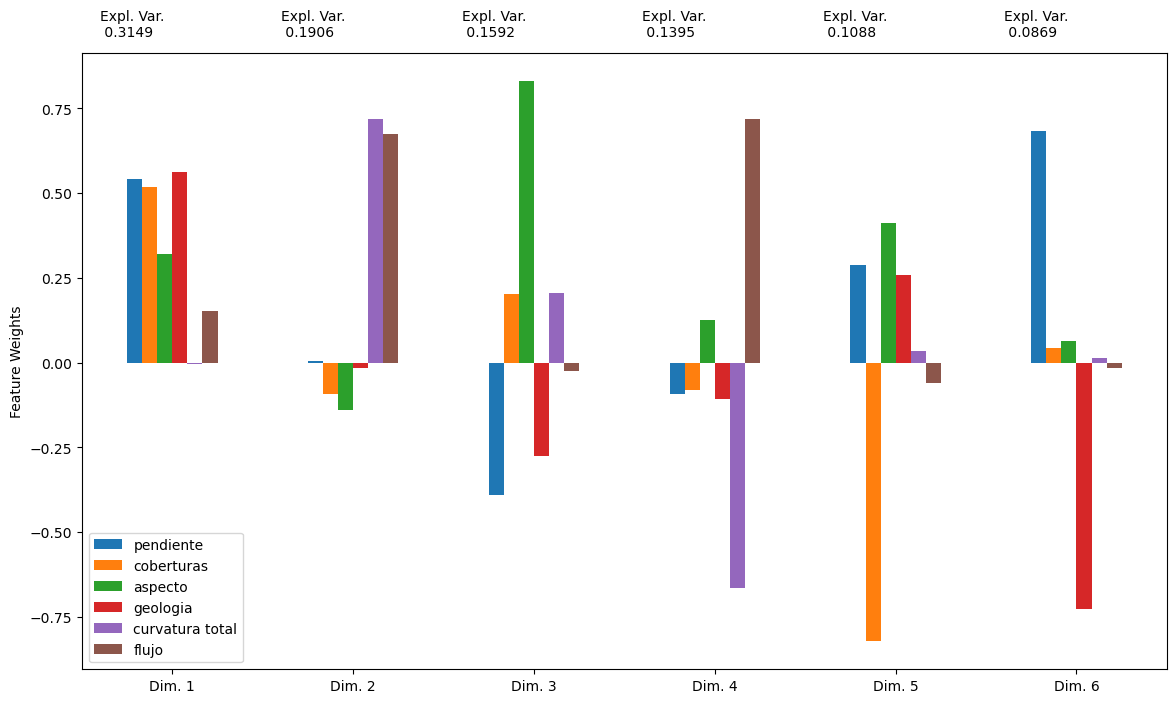

In [104]:
def pca_results(df, pca):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = df.keys()) 
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(df, pca)

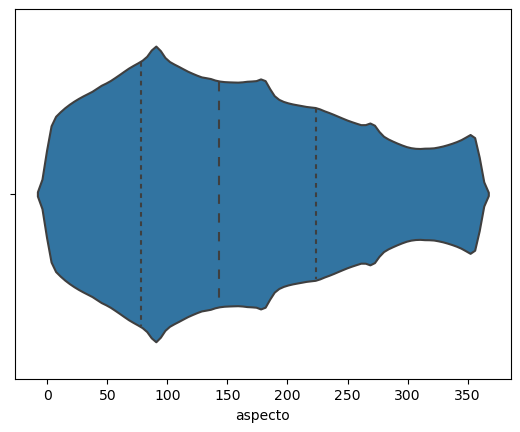

In [74]:
sns.violinplot(x=df['aspecto'], inner='quartile', label="Aspecto");

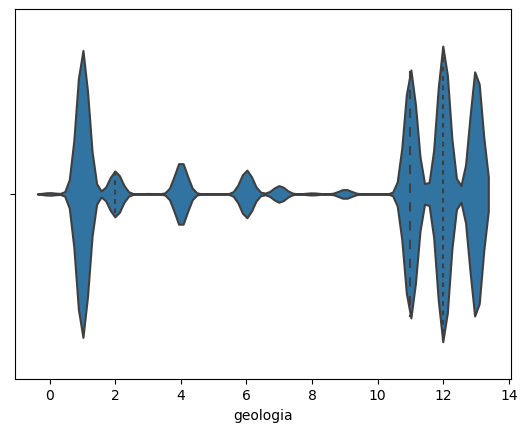

In [47]:
sns.violinplot(x=df['geologia'], inner='quartile');

<Axes: xlabel='pendiente'>

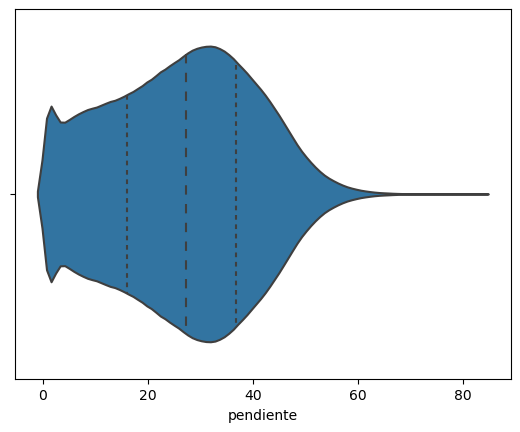

In [48]:
sns.violinplot(x=df['pendiente'], inner='quartile')

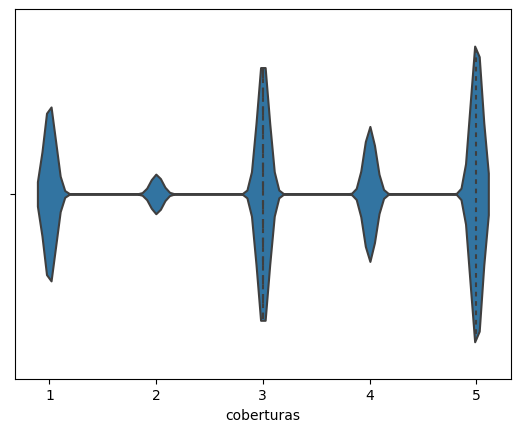

In [49]:
sns.violinplot(x=df['coberturas'], inner='quartile');

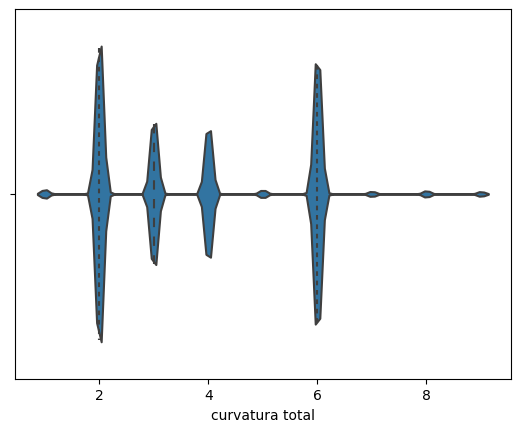

In [50]:
sns.violinplot(x=df['curvatura total'], inner='quartile');

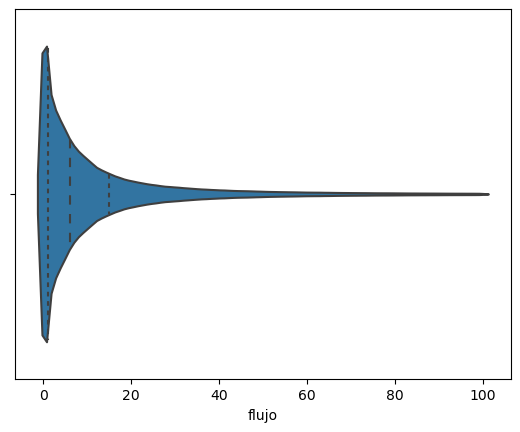

In [51]:
sns.violinplot(x=df['flujo'], inner='quartile');

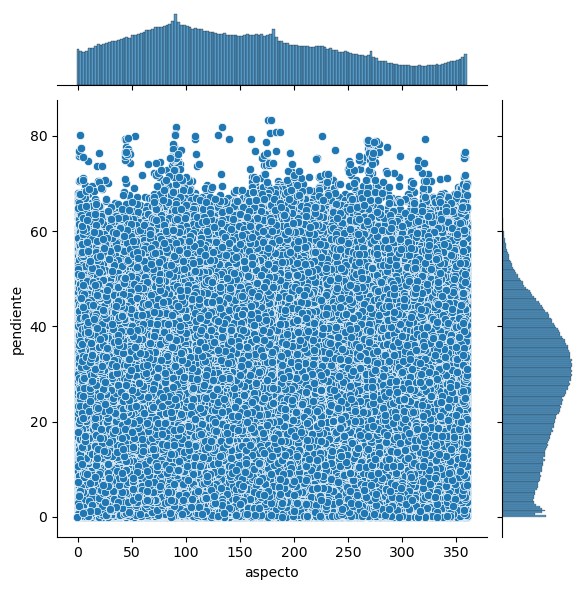

In [78]:
sns.jointplot(x='aspecto', y='pendiente', data=df1, kind='scatter');

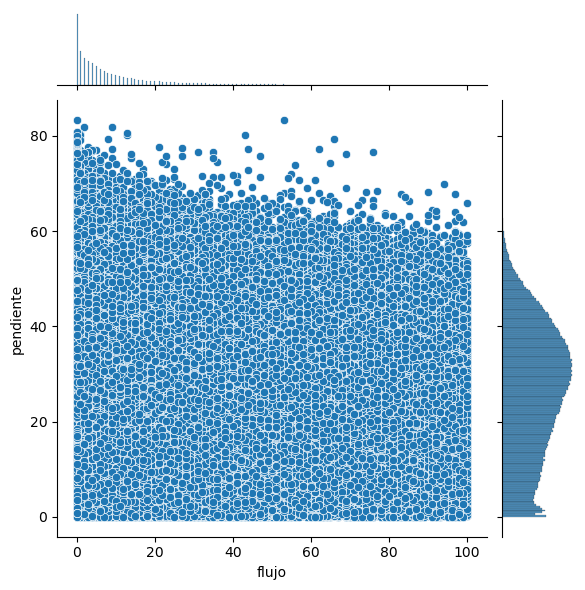

In [27]:
sns.jointplot(x='flujo', y='pendiente', data=df1, kind='scatter');

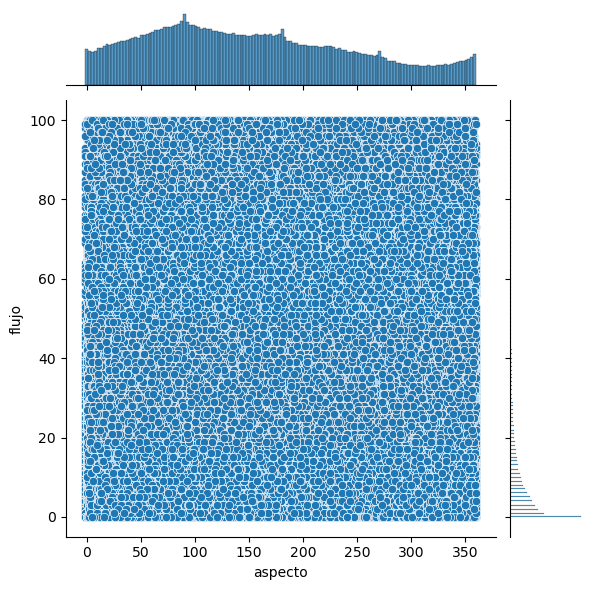

In [43]:
sns.jointplot(x='aspecto', y='flujo', data=df1, kind='scatter');

In [32]:
landslides=df.inventario.astype(bool)
si_lands=df[landslides]
no_lands=df[~landslides]
si_lands.count()

inventario         63819
pendiente          63819
coberturas         63819
aspecto            63819
geologia           63819
curvatura total    63819
flujo              63819
dtype: int64

In [33]:
no_lands.count()

inventario         11984770
pendiente          11984770
coberturas         11984770
aspecto            11984770
geologia           11984770
curvatura total    11984770
flujo              11984770
dtype: int64

In [79]:
media=df.groupby('inventario').mean()
print(media)

            pendiente  coberturas     aspecto  geologia  curvatura total  \
inventario                                                                 
0.0         26.455828    3.370625  154.624954  8.409911         3.828579   
1.0         30.587906    3.843511  142.234924  8.439242         3.965057   

                flujo  
inventario             
0.0         12.065327  
1.0         13.775553  


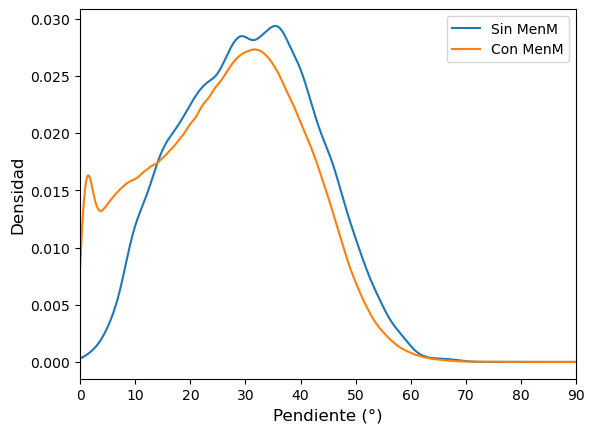

In [47]:
fig, ax = plt.subplots()
si_lands['pendiente'].plot.kde(ax=ax, label='Sin MenM')
no_lands['pendiente'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Pendiente (°)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

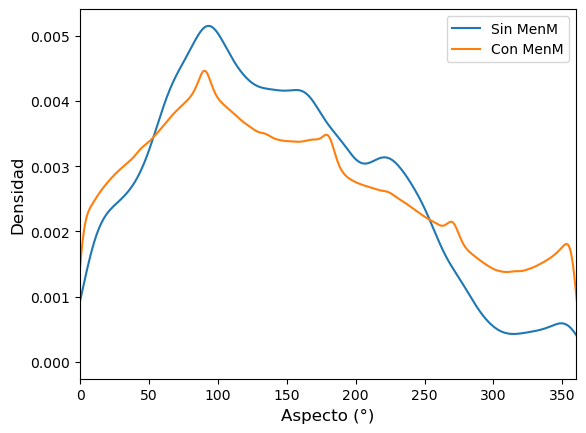

In [40]:
fig, ax = plt.subplots()
si_lands['aspecto'].plot.kde(ax=ax, label='Sin MenM')
no_lands['aspecto'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,360)
ax.set_xlabel('Aspecto (°)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

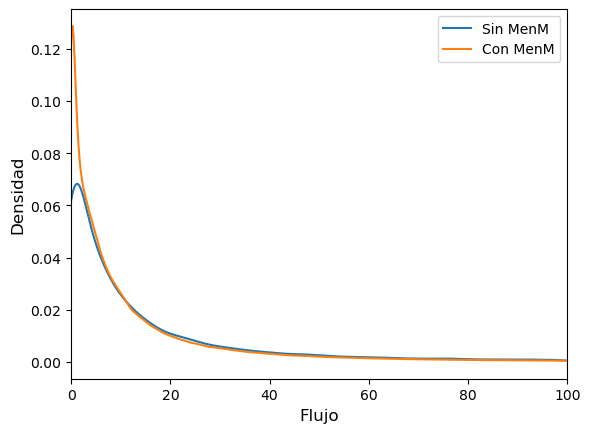

In [41]:
fig, ax = plt.subplots()
si_lands['flujo'].plot.kde(ax=ax, label='Sin MenM')
no_lands['flujo'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,100)
ax.set_xlabel('Flujo', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

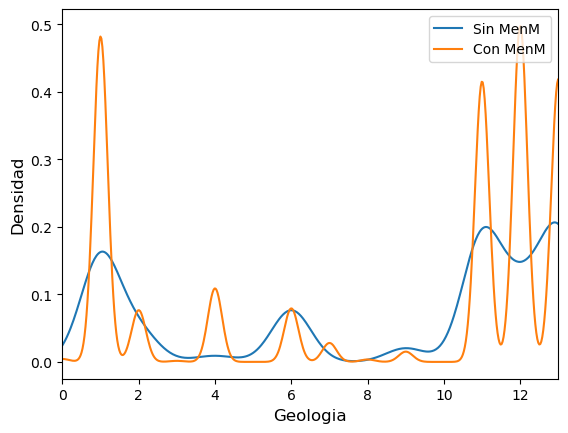

In [42]:
fig, ax = plt.subplots()
si_lands['geologia'].plot.kde(ax=ax, label='Sin MenM')
no_lands['geologia'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,13)
ax.set_xlabel('Geologia', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

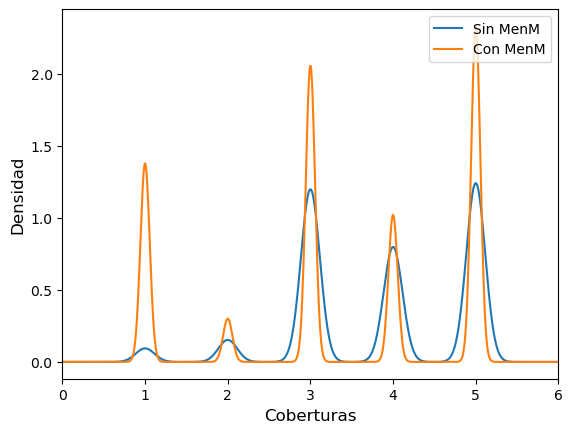

In [94]:
fig, ax = plt.subplots()
si_lands['coberturas'].plot.kde(ax=ax, label='Sin MenM')
no_lands['coberturas'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,6)
ax.set_xlabel('Coberturas', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

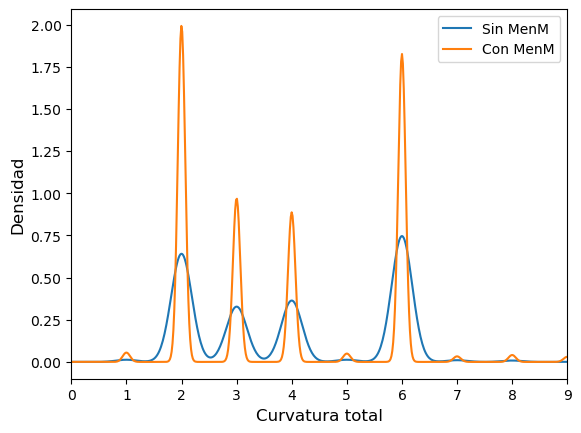

In [95]:
fig, ax = plt.subplots()
si_lands['curvatura total'].plot.kde(ax=ax, label='Sin MenM')
no_lands['curvatura total'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,9)
ax.set_xlabel('Curvatura total', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

# Metodo heurísticos

In [15]:
A= ([[1,3,5,7],[0.33,1,3,5],[0.2,0.33,1,3],[0.14,0.2,0.33,1]])

B=np.array(A) # para transformarla en una matriz

values, vectores=np.linalg.eig(B) # Función para calcular los valores y vectores propios

vector_norm=vectores/np.linalg.norm(vectores, ord=1) # normalización de los vectores

print('esto son los valores propios',values)

esto son los valores propios [ 4.10418230e+00+0.j         -2.73677129e-03+0.69067747j
 -2.73677129e-03-0.69067747j -9.87087569e-02+0.j        ]


In [16]:
print('esto son los vectores propios', vectores)


esto son los vectores propios [[ 0.8885252 +0.j          0.90591565+0.j          0.90591565-0.j
   0.83485943+0.j        ]
 [ 0.41128689+0.j          0.00690797+0.37500004j  0.00690797-0.37500004j
  -0.49111203+0.j        ]
 [ 0.1842361 +0.j         -0.17285308+0.02556577j -0.17285308-0.02556577j
   0.23293632+0.j        ]
 [ 0.08615757+0.j         -0.00926477-0.0895905j  -0.00926477+0.0895905j
  -0.0869447 +0.j        ]]


In [17]:
print('esto son los vectores propios normalizados',vector_norm)

esto son los vectores propios normalizados [[ 0.53985713+0.j          0.55042336+0.j          0.55042336-0.j
   0.50725046+0.j        ]
 [ 0.24989293+0.j          0.0041972 +0.22784548j  0.0041972 -0.22784548j
  -0.29839371+0.j        ]
 [ 0.11193962+0.j         -0.10502344+0.01553345j -0.10502344-0.01553345j
   0.14152928+0.j        ]
 [ 0.0523483 +0.j         -0.00562916-0.0544341j  -0.00562916+0.0544341j
  -0.05282654+0.j        ]]


In [18]:
w=vector_norm[:,0]
print(w)

[0.53985713+0.j 0.24989293+0.j 0.11193962+0.j 0.0523483 +0.j]


In [19]:
CI=(values[0]-len(values))/(len(values)-1)

CR= CI/1.24

print(CR)

(0.028005994475820455+0j)


[0.   0.25 0.5  0.75 1.    nan]


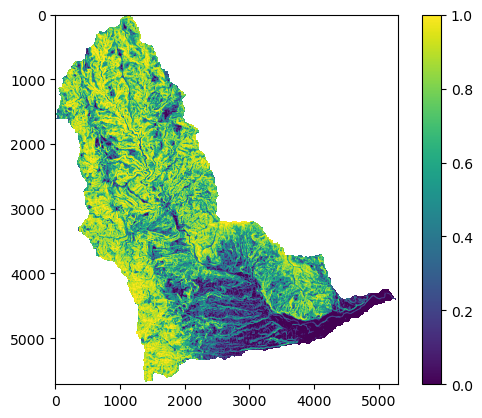

In [25]:
pendiente_re= np.where ((np.logical_and(pendiente>0,pendiente<10)),0,pendiente)
pendiente_re= np.where ((np.logical_and(pendiente>10,pendiente<15)),0.25,pendiente_re)
pendiente_re= np.where ((np.logical_and(pendiente>15,pendiente<25)),0.5,pendiente_re)
pendiente_re= np.where ((np.logical_and(pendiente>25,pendiente<35)),0.75,pendiente_re)
pendiente_re= np.where (((pendiente>=35)),1,pendiente_re)
print(np.unique(pendiente_re));
plt.imshow(pendiente_re);
plt.colorbar();

[0.   0.25 0.5  0.75 1.    nan]


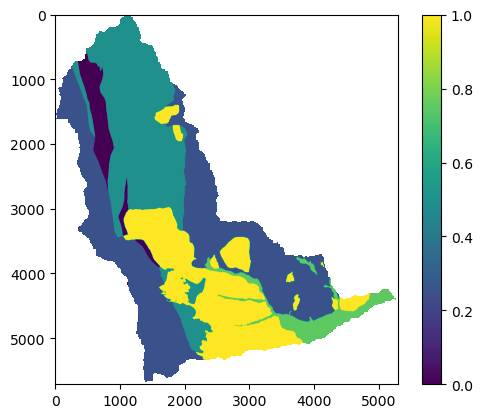

In [26]:
geologia_re= np.where ((np.logical_or(geologia==6,geologia==10)),0,geologia)
geologia_re= np.where ((geologia==9),0,geologia_re)
geologia_re= np.where ((np.logical_or(geologia==11,geologia==13)),0.25,geologia_re)
geologia_re= np.where ((np.logical_or(geologia==12,geologia==2)),0.5,geologia_re)
geologia_re= np.where ((geologia==7),0.5,geologia_re)
geologia_re= np.where ((np.logical_or(geologia==4,geologia==8)),0.75,geologia_re)
geologia_re= np.where ((geologia==5),0.75,geologia_re)
geologia_re= np.where ((np.logical_or(geologia==1,geologia==3)),1,geologia_re)
print(np.unique(geologia_re));
plt.imshow(geologia_re);
plt.colorbar();

[0.   0.25 0.5  0.75 1.    nan]


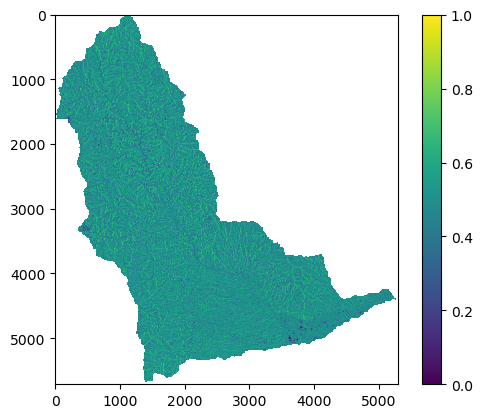

In [27]:
curvatura_re= np.where ((np.logical_or(curvatura==9,curvatura==6)),0,curvatura)
curvatura_re= np.where ((np.logical_or(curvatura==1,curvatura==5)),0.25,curvatura_re)
curvatura_re= np.where ((np.logical_or(curvatura==3,curvatura==4)),0.5,curvatura_re)
curvatura_re= np.where ((np.logical_or(curvatura==7,curvatura==8)),0.75,curvatura_re)
curvatura_re= np.where (((curvatura==2)),1,curvatura_re)
print(np.unique(curvatura_re));
plt.imshow(curvatura_re);
plt.colorbar();

[0.   0.25 0.5  0.75 1.    nan]


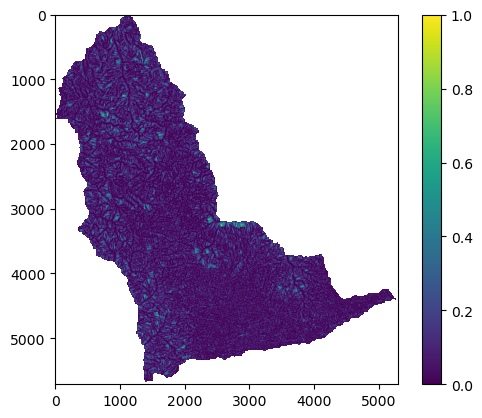

In [28]:
flujo_re=np.where ((np.logical_and(facc>=0,facc<20)),0,facc)
flujo_re=np.where ((np.logical_and(facc>=20,facc<40)),0.25,flujo_re)
flujo_re=np.where ((np.logical_and(facc>=40,facc<60)),0.5,flujo_re)
flujo_re=np.where ((np.logical_and(facc>=60,facc<80)),0.75,flujo_re)
flujo_re=np.where (((facc>=80)),1,flujo_re)
print(np.unique(flujo_re));
plt.imshow(flujo_re);
plt.colorbar();

In [23]:
print(w[0],w[1],w[2],w[3])

(0.5398571324003367+0j) (0.24989292597909876+0j) (0.11193961905713097+0j) (0.05234829734371893+0j)


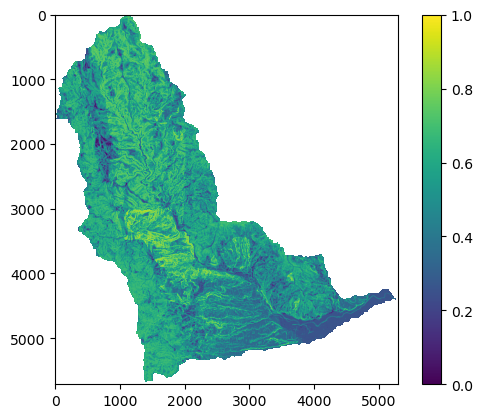

In [29]:
IS=0.55*pendiente_re+0.26*geologia_re+0.12*curvatura_re+0.07*flujo_re
plt.imshow(IS)
plt.colorbar();

In [30]:
meta=raster.profile
raster_transform = meta['transform']
raster_crs = meta['crs']

with rio.open('IS.TIF', 'w', 
              driver='Gtiff',height=aspecto.shape[0],width=aspecto.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster_crs,transform=raster_transform) as dst:
    dst.write(IS,1);

# Metodos basados en datos bivariados

In [13]:
pendiente_serie=pd.Series(pendiente_vector_MenM)
ap=bp=cp=dp=ep=0
for row in pendiente_serie:
        if (0 <= row) & (row < 10):
            ap+=1
        elif (10 <= row) & (row < 15):
            bp+=1
        elif (15 <= row) & (row < 25):
            cp+=1
        elif (25 <= row) & (row < 35):
            dp+=1
        if (row>=35):
            ep+=1

totalp=ap+bp+cp+dp+ep
print("total:", totalp,ap,bp,cp,dp,ep)

pendienteconMenM=pendiente_vector_MenM*inventario_vector_MenM
ap1=bp1=cp1=dp1=ep1=0
for row in pendienteconMenM:
        if (0 < row) & (row < 10):
            ap1+=1
        elif (10 <= row) & (row < 15):
            bp1+=1
        elif (15 <= row) & (row < 25):
            cp1+=1
        elif (25 <= row) & (row < 35):
            dp1+=1
        if (row>=35):
            ep1+=1

total1p=ap1+bp1+cp1+dp1+ep1
print("total1:", total1p,ap1,bp1,cp1,dp1,ep1)

total: 12048589 1791720 1018408 2516265 3187328 3534868
total1: 63819 2652 4886 14212 17854 24215


In [14]:
w_a=(ap1/total1p)/(ap/totalp)
w_b=(bp1/total1p)/(bp/totalp)
w_c=(cp1/total1p)/(cp/totalp)
w_d=(dp1/total1p)/(dp/totalp)
w_e=(ep1/total1p)/(ep/totalp)
print(w_a,w_b,w_c,w_d,w_e)

0.2794406439560922 0.9057698400727422 1.0663137691115245 1.05753553107544 1.2932946103495686


In [15]:
geologia_serie=pd.Series(geologia_vector_MenM)
ag=bg=cg=dg=eg=0
for row in geologia_serie:
        if (6 == row) or (row == 10) or (row ==9):
            ag+=1
        elif (11 == row) or (row == 13):
            bg+=1
        elif (12 == row) or (row == 2) or (row == 7):
            cg+=1
        elif (4 == row) or (row == 8) or (row == 5):
            dg+=1
        if (row==1) or (row == 3):
            eg+=1

totalg=ag+bg+cg+dg+eg
print("total:", totalg,ag,bg,cg,dg,eg)

geologiaconMenM=geologia_vector_MenM*inventario_vector_MenM
ag1=bg1=cg1=dg1=eg1=0
for row in geologiaconMenM:
        if (6 == row) or (row == 10) or (row ==9):
            ag1+=1
        elif (11 == row) or (row == 13):
            bg1+=1
        elif (12 == row) or (row == 2) or (row == 7):
            cg1+=1
        elif (4 == row) or (row == 8) or (row == 5):
            dg1+=1
        if (row==1) or (row == 3):
            eg1+=1

total1g=ag1+bg1+cg1+dg1+eg1
print("total1:", total1g,ag1,bg1,cg1,dg1,eg1)

total: 12048589 564224 4721691 3397628 633714 2731332
total1: 63819 8051 31016 10978 745 13029


In [16]:
curvatura_serie=pd.Series(curvatura_vector_MenM)
ac=bc=cc=dc=ec=0
for row in curvatura_serie:
        if (6 == row) or (row ==9):
            ac+=1
        elif (1 == row) or (row == 5):
            bc+=1
        elif (3 == row) or (row == 4):
            cc+=1
        elif (7 == row) or (row == 8):
            dc+=1
        if (row==2):
            ec+=1

totalc=ac+bc+cc+dc+ec
print("total:", totalc,ac,bc,cc,dc,ec)

curvaturaconMenM=curvatura_vector_MenM*inventario_vector_MenM
ac1=bc1=cc1=dc1=ec1=0
for row in curvaturaconMenM:
        if (6 == row) or (row ==9):
            ac1+=1
        elif (1 == row) or (row == 5):
            bc1+=1
        elif (3 == row) or (row == 4):
            cc1+=1
        elif (7 == row) or (row == 8):
            dc1+=1
        if (row==2):
            ec1+=1

total1c=ac1+bc1+cc1+dc1+ec1
print("total1:", total1c,ac1,bc1,cc1,dc1,ec1)

total: 12048589 3800988 214320 3803662 151217 4078402
total1: 63819 22450 778 20776 555 19260


In [17]:
flujo_serie=pd.Series(facc_vector_MenM+0.000001)
af=bf=cf=df=ef=0
for row in flujo_serie:
        if (0 < row) & (row < 5):
            af+=1
        elif (5 <= row) & (row < 10):
            bf+=1
        elif (10 <= row) & (row < 20):
            cf+=1
        elif (20 <= row) & (row < 30):
            df+=1
        if (row>=30):
            ef+=1

totalf=af+bf+cf+df+ef
print("total:", totalf,af,bf,cf,df,ef)

flujoconMenM=(facc_vector_MenM + 0.000001) * (inventario_vector_MenM)

af1=bf1=cf1=df1=ef1=0
for row in flujoconMenM:   
    if (0 < row) & (row < 5):
            af1+=1
    elif (5 <= row) & (row < 10):
            bf1+=1
    elif (10 <= row) & (row < 20):
            cf1+=1
    elif (20 <= row) & (row < 30):
            df1+=1
    if (row>=30):
            ef1+=1

total1f=af1+bf1+cf1+df1+ef1
print("total1:", total1f,af1,bf1,cf1,df1,ef1)

total: 12048589 5423277 2256253 2047190 896183 1425686
total1: 63819 27100 11133 10981 5306 9299


## Pendiente

-1.2787950161529484 0.11922729485324075 -0.09947169540572884 0.008708898170440486 0.0645608086740022 -0.01775320038504088 0.056247654624495526 -0.021022431707697933 0.258755941183792 -0.1305006103985159
[-1.3980223  -0.10818059  0.07727008  0.08231401  0.38925654         nan]


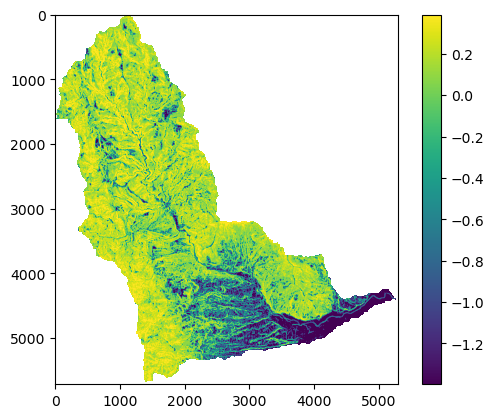

In [19]:
#Clase a 
x1=ap1
x2=total1p-ap1
x3=ap-ap1
x4=(bp+cp+dp+ep)-(bp1+cp1+dp1+ep1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where ( (np.logical_and (pendiente>=0, pendiente<10 )),cont,pendiente );

#Clase b
x1=bp1
x2=total1p-bp1
x3=bp-bp1
x4=(ap+cp+dp+ep)-(ap1+cp1+dp1+ep1)

wp_b=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_b=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where ( (np.logical_and (pendiente_c>=10, pendiente_c<15 )),cont,pendiente_c )

#Clase c
x1=cp1
x2=total1p-cp1
x3=cp-cp1
x4=(ap+bp+dp+ep)-(ap1+bp1+dp1+ep1)

wp_c=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_c=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where ( (np.logical_and (pendiente_c>=15, pendiente_c<25 )),cont,pendiente_c )

#Clase d
x1=dp1
x2=total1p-dp1
x3=dp-dp1
x4=(ap+bp+cp+ep)-(ap1+bp1+cp1+ep1)

wp_d=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_d=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where ( (np.logical_and (pendiente_c>=25, pendiente_c<35 )),cont,pendiente_c )

#Clase e
x1=ep1
x2=total1p-ep1
x3=ep-ep1
x4=(ap+bp+cp+dp)-(ap1+bp1+cp1+dp1)

wp_e=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_e=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where (pendiente_c>=35,cont,pendiente_c)
print(wp_a, wn_a, wp_b, wn_b, wp_c, wn_c, wp_d, wn_d, wp_e, wn_e)
plt.imshow(pendiente_c)
plt.colorbar()
print(np.unique(pendiente_c));

0.6679648124204605 -0.06797836681612929 0.21651243041459808 -0.1689594166939416 -0.49636223669343643 0.14332955521014376 -1.509451504032493 0.0425179558952683 -0.10524442093438949 0.02888302516853699
[-1.55196946 -0.63969179 -0.13412745  0.38547185  0.73594318         nan]


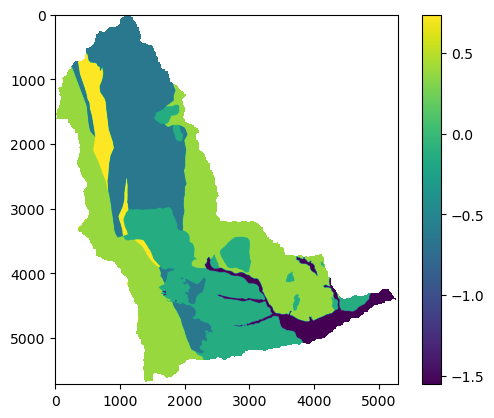

In [21]:
#Clase a 
x1=ag1
x2=total1g-ag1
x3=ag-ag1
x4=(bg+cg+dg+eg)-(bg1+cg+dg1+eg1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where ( (np.logical_or (geologia==6, geologia==10 )),c,geologia );
geologia_c=np.where ( (geologia_c==9),c,geologia_c )

#Clase b
x1=bg1
x2=total1g-bg1
x3=bg-bg1
x4=(ag+cg+dg+eg)-(ag1+cg1+dg1+eg1)

wp_b=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_b=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where ( (np.logical_or (geologia_c==11, geologia_c==13 )),cont,geologia_c )

#Clase c
x1=cg1
x2=total1g-cg1
x3=cg-cg1
x4=(ag+bg+dg+eg)-(ag1+bg1+dg1+eg1)

wp_c=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_c=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where ( (np.logical_or (geologia_c==12, geologia_c==2 )),cont,geologia_c )
geologia_c=np.where ( (geologia_c==7),cont,geologia_c )

#Clase d
x1=dg1
x2=total1g-dg1
x3=dg-dg1
x4=(ag+bg+cg+eg)-(ag1+bg1+cg1+eg1)

wp_d=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_d=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where ( (np.logical_or (geologia_c==4, geologia_c==8 )),cont,geologia_c )
geologia_c=np.where ( (geologia_c==5),cont,geologia_c )

#Clase e
x1=eg1
x2=total1g-eg1
x3=eg-eg1
x4=(ag+bg+cg+dg)-(ag1+bg1+cg1+dg1)

wp_e=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_e=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where ( (np.logical_or (geologia_c==1, geologia_c==3 )),cont,geologia_c )
print(wp_a, wn_a, wp_b, wn_b, wp_c, wn_c, wp_d, wn_d, wp_e, wn_e)
plt.imshow(geologia_c)
plt.colorbar()
print(np.unique(geologia_c));

0.10953917724844972 -0.054776332151529314 -0.37952128506552296 0.005712784877112639 0.030896989366397867 -0.014578542562092022 -0.3684850780975319 0.003916301918079594 -0.11535548947191909 0.054298319578646025
[-0.38523407 -0.37240138 -0.16965381  0.04547553  0.16431551         nan]


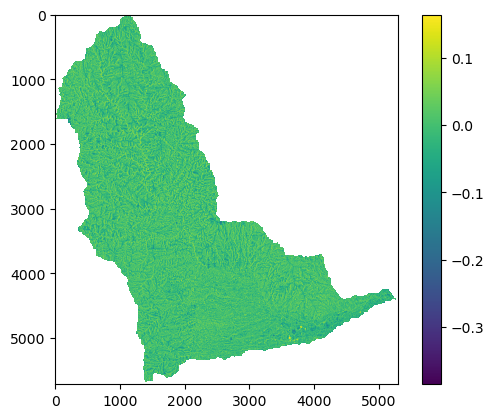

In [25]:
#Clase a 
x1=ac1
x2=total1c-ac1
x3=ac-ac1
x4=(bc+cc+dc+ec)-(bc1+cc1+dc1+ec1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

curvatura_c=np.where ( (np.logical_or (curvatura==6, curvatura==9 )),cont,curvatura );

#Clase b
x1=bc1
x2=total1c-bc1
x3=bc-bc1
x4=(ac+cc+dc+ec)-(ac1+cc1+dc1+ec1)

wp_b=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_b=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

curvatura_c=np.where ( (np.logical_or (curvatura_c==1, curvatura_c==5 )),cont,curvatura_c );

#Clase c
x1=cc1
x2=total1c-cc1
x3=cc-cc1
x4=(ac+bc+dc+ec)-(ac1+bc1+dc1+ec1)

wp_c=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_c=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

curvatura_c=np.where ( (np.logical_or (curvatura_c==3, curvatura_c==4 )),cont,curvatura_c );

#Clase d
x1=dc1
x2=total1c-dc1
x3=dc-dc1
x4=(ac+bc+cc+ec)-(ac1+bc1+cc1+ec1)

wp_d=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_d=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

curvatura_c=np.where ( (np.logical_or (curvatura_c==7, curvatura_c==8 )),cont,curvatura_c );

#Clase e
x1=ec1
x2=total1c-ec1
x3=ec-ec1
x4=(ac+bc+cc+dc)-(ac1+bc1+cc1+dc1)

wp_e=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_e=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

curvatura_c=np.where (curvatura_c==2,cont,curvatura_c)
print(wp_a, wn_a, wp_b, wn_b, wp_c, wn_c, wp_d, wn_d, wp_e, wn_e)
plt.imshow(curvatura_c)
plt.colorbar()
print(np.unique(curvatura_c));

-0.05857128660834925 0.04554023724729859 -0.07125957574580667 0.01573030827784335 0.012662486325490798 -0.002611563382611435 0.11197288928344629 -0.00956009957198446 0.2093833298699581 -0.031713475829569834
[-0.10411152 -0.08698989  0.01527405  0.12153299  0.24109681         nan]


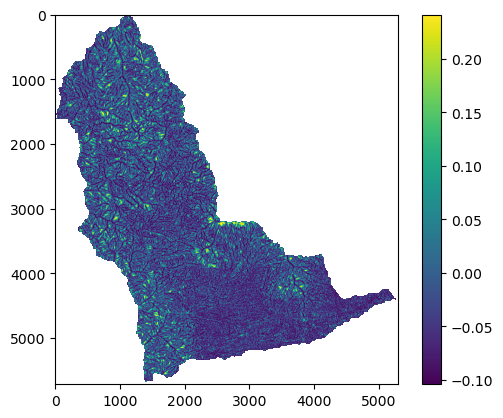

In [26]:
#Clase a 
x1=af1
x2=total1f-af1
x3=af-af1
x4=(bf+cf+df+ef)-(bf1+cf1+df1+ef1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

flujo_c=np.where ( (np.logical_and (facc>=0, facc<5 )),cont,facc );

#Clase b
x1=bf1
x2=total1f-bf1
x3=bf-bf1
x4=(af+cf+df+ef)-(af1+cf1+df1+ef1)

wp_b=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_b=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

flujo_c=np.where ( (np.logical_and (flujo_c>=5, flujo_c<10 )),cont,flujo_c );

#Clase c
x1=cf1
x2=total1f-cf1
x3=cf-cf1
x4=(af+bf+df+ef)-(af1+bf1+df1+ef1)

wp_c=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_c=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

flujo_c=np.where ( (np.logical_and (flujo_c>=10, flujo_c<20 )),cont,flujo_c );

#Clase d
x1=df1
x2=total1f-df1
x3=df-df1
x4=(af+bf+cf+ef)-(af1+bf1+cf1+ef1)

wp_d=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_d=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

flujo_c=np.where ( (np.logical_and (flujo_c>=20, flujo_c<30 )),cont,flujo_c );

#Clase e
x1=ef1
x2=total1f-ef1
x3=ef-ef1
x4=(af+bf+cf+df)-(af1+bf1+cf1+df1)

wp_e=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_e=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

flujo_c=np.where (flujo_c>=30,cont,flujo_c)
print(wp_a, wn_a, wp_b, wn_b, wp_c, wn_c, wp_d, wn_d, wp_e, wn_e)
plt.imshow(flujo_c)
plt.colorbar()
print(np.unique(flujo_c));

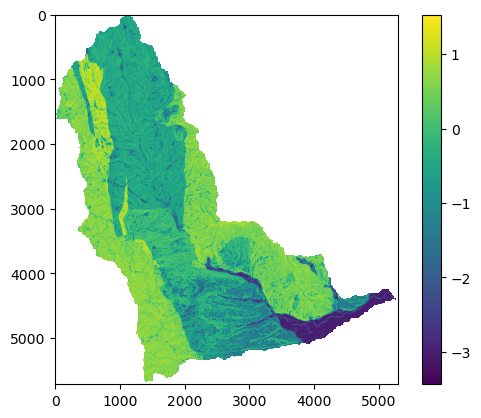

In [28]:
IS_bivariado=pendiente_c+curvatura_c+geologia_c+flujo_c
plt.imshow(IS);
plt.colorbar();

In [29]:
meta=raster.profile
raster_transform = meta['transform']
raster_crs = meta['crs']

with rio.open('IS_BIVARIADO.TIF', 'w', 
              driver='Gtiff',height=aspecto.shape[0],width=aspecto.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster_crs,transform=raster_transform) as dst:
    dst.write(IS_bivariado,1);